In [43]:
# import necessary libraries
import pandas as pd

In [ ]:
# Access the noisy_classification_1 dataset
df = pd.read_csv("data/noisy_classification_1.csv")
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.head()

,feature_0,feature_1,feature_2,feature_3,feature_4
0,-2.197183,-0.489003,-0.799921,0.625037,-0.390723
1,0.156142,0.501997,-0.270857,-1.062878,1.296290
2,-1.333895,0.141301,-0.853870,-0.457173,-1.579016
3,-1.002132,-0.063892,1.091989,2.191322,2.181747
4,-0.320139,1.236692,0.408762,0.014000,-1.367234


In [45]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

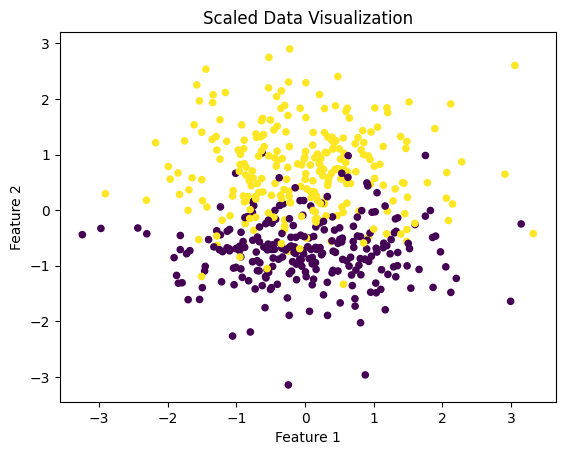

In [46]:
# Visualize the data, first two features
import matplotlib.pyplot as plt
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scaled Data Visualization')
plt.show()

In [47]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Set up the model and fit the data to it
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


# ensemble_model.fit(X_train, y_train)

,estimators,"[('dt', ...), ('lr', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,5


In [49]:
# Predict on the models
y_pred = ensemble_model.predict(X_test)
y_pred_train = ensemble_model.predict(X_train)

In [50]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train)) 

Test Accuracy: 0.92
Train Accuracy: 0.9025


In [51]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92        50
           1       0.94      0.90      0.92        50

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



<Axes: >

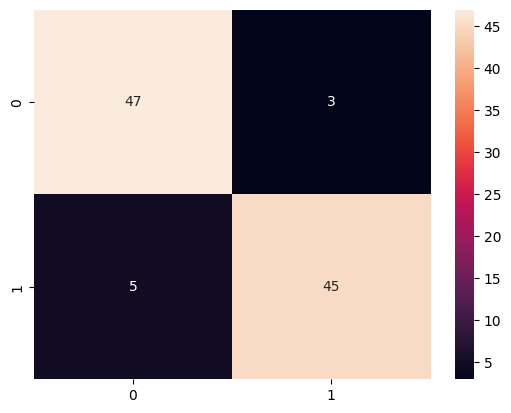

In [55]:
import seaborn as sns
# Print confusion matrix
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
